# Calculations and Exercises for:Long-Run Economic Growth Theory: Presenting the Model

## Setting up the Python/Jupyter environment

In [1]:
%%javascript  

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# report library versions...

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
%matplotlib inline 

# put graphs into the notebook itself...

In [5]:
# graphics setup: seaborn-whitegrid and figure size...

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

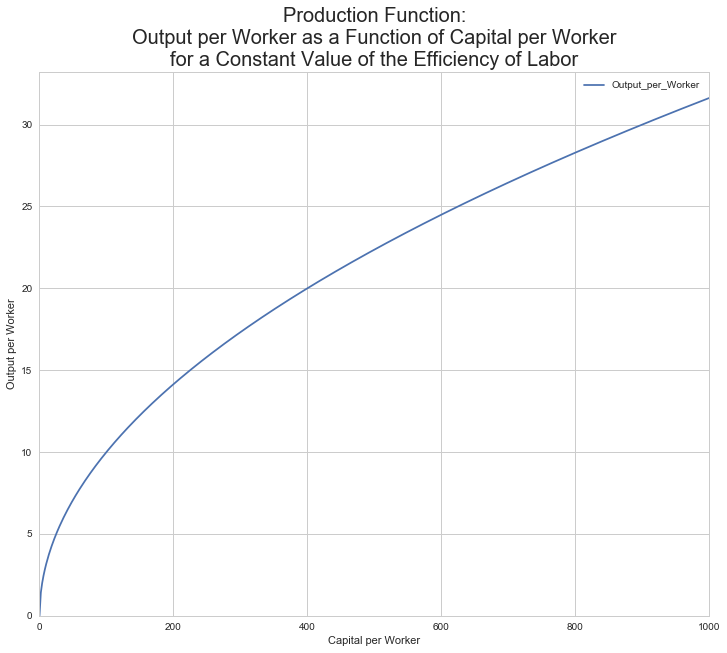

In [7]:
# what the Cobb-Douglas production function looks like

alpha = 0.5
E = 1

output_per_worker = np.zeros((501, 2))

for i in range(501):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + 2 * i
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

str1 = "Production Function:"
str2 = "Output per Worker as a Function of Capital per Worker"
str3 = "for a Constant Value of the Efficiency of Labor"
plt.title(str1 + "\n" + str2 + "\n" + str3, size = 20)




# Possible Exercises: 
# -------------------
#
# 1. Change the value of the parameter α in the production function:
#    what does it look like if α = 0, 1/3, 2/3, 1, respectively? (Change
#    the value of α by altering the right-hand side of the "alpha = 0.5"
#    line of code)
# 2. Change the value of the efficiency of labor E in the production
#    function. How would the production function be changing over 
#    time if the efficiency of labor were growing over time? (Change
#    the value of the efficiency of labor E by altering the right-hand 
#    side of the "alpha = 0.5" line of code)
# 3. Look out over a larger or different domain: let K/L vary not over
#    [0, 1000] but over some other set of values. (Change the lowest
#    value of K/L examined by changing the "lowestkoverl = 0" line of
#    code; change the spread of the values of K/L examined by changing
#    the "output_per_worker[i, 0] = lowestkoverl + 2 * i" line of code.) 

----

&nbsp;

(0, 140.43546404504863)

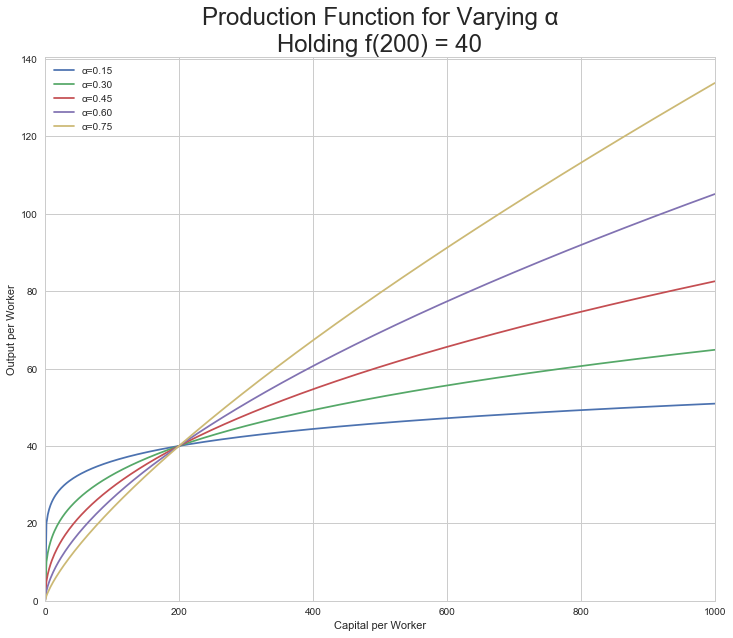

In [8]:
# calculations for Figure 4.6

E = 40

for a in range(5):
    output_per_worker = np.zeros((501, 2))
    alpha = 0.15 * (a + 1)
    for i in range(501):
        output_per_worker[i, 0] = 2 * i
        output_per_worker[i, 1] = ((output_per_worker[i, 0] ** alpha) * E / 
            ((200) ** alpha) )
    output_per_worker_df = DataFrame(data = output_per_worker, 
        columns = ["Capital_per_Worker", "Output_per_Worker"])

    plt.plot(output_per_worker_df.Capital_per_Worker, output_per_worker_df.Output_per_Worker)
    plt.legend(["α=0.15", "α=0.30", "α=0.45", "α=0.60", "α=0.75"])
    
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.title("Production Function for Varying α\nHolding f(200) = 40", size = 24)
plt.xlim(0, 1000)
plt.ylim(0, )

----

&nbsp;

(0, 74.246212024587493)

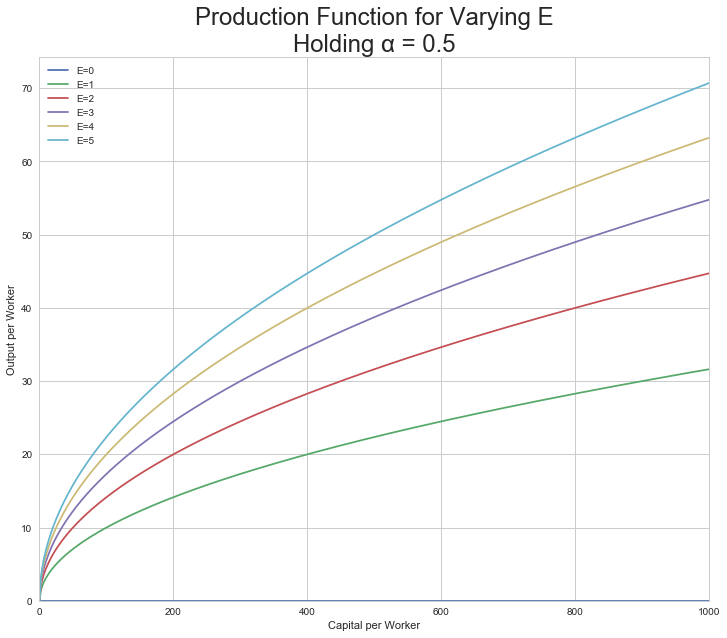

In [9]:
# calculations for Figure 4.7

alpha = 0.5

for E in range(6):
    output_per_worker = np.zeros((501, 2))
    for i in range(501):
        output_per_worker[i, 0] = 2 * i
        output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E**(1 - alpha)
    output_per_worker_df = DataFrame(data = output_per_worker, 
        columns = ["Capital_per_Worker", "Output_per_Worker"])

    plt.plot(output_per_worker_df.Capital_per_Worker, output_per_worker_df.Output_per_Worker)
    plt.legend(["E=0", "E=1", "E=2", "E=3", "E=4", "E=5"])
    
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.title("Production Function for Varying E\nHolding α = 0.5", size = 24)
plt.xlim(0, 1000)
plt.ylim(0, )

(0, 287.58802216095813)

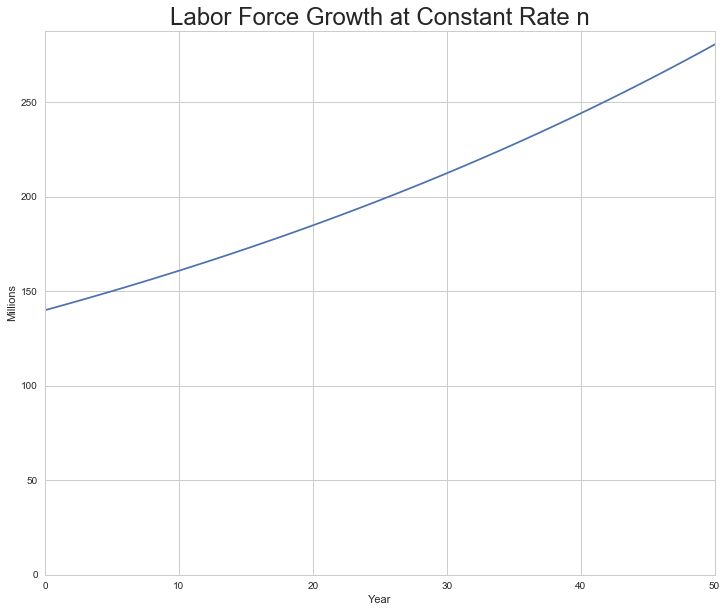

In [10]:
# calculations for Figure 4.9

# initialize the dataframe...

df = pd.DataFrame(index=range(50),columns=['Labor'], dtype='float')

# initial conditions: labor force

L0 = 140
n = 0.014

# initialize the dataframe at time 0 by setting L, E, K...

df.Labor[0] = L0

# And now we loop the system forward, watching what it does
# for 50 years...

for i in range(50):
    df.Labor[i+1] = df.Labor[i] +df.Labor[i] * n
                                                  
# And plot the results:
                                                  
df.Labor.plot()

plt.xlabel("Year")
plt.ylabel("Millions")
plt.title("Labor Force Growth at Constant Rate n", size = 24)
plt.xlim(0, 50)
plt.ylim(0, )



# Possible Exercises: 
# -------------------
#
# 1. What does the graph look like with a different rate of growth n?
# 2. What does the graph look like with a different value for the
#    initial labor force L(0)?
# 3. What does the graph look like over a longer period of time?

(0, 2.5119945355453348)

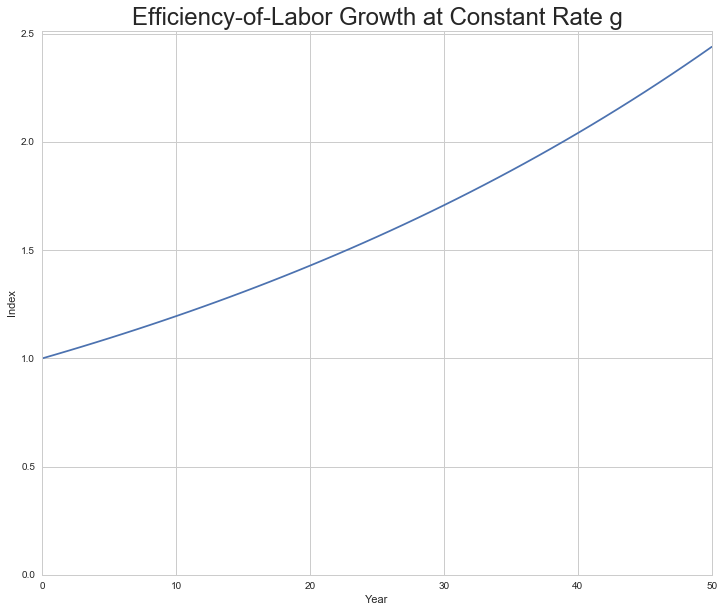

In [11]:
# calculations for Figure 4.10

# initialize the dataframe...

df = pd.DataFrame(index=range(50),columns=['Efficiency'], dtype='float')

# initial conditions: efficiency

E0 = 1.000
g = 0.018

# initialize the dataframe at time 0...

df.Efficiency[0] = E0

# And now we loop the system forward, watching what it does
# for 50 years...

for i in range(50):
    df.Efficiency[i+1] = df.Efficiency[i] +df.Efficiency[i] * g
                                                  
# And plot the results:
                                                  
df.Efficiency.plot()

plt.xlabel("Year")
plt.ylabel("Index")
plt.title("Efficiency-of-Labor Growth at Constant Rate g", size = 24)
plt.xlim(0, 50)
plt.ylim(0, )



# Possible Exercises: 
# -------------------
#
# 1. What does the graph look like with a different rate of growth g?
# 2. What does the graph look like with a different value for the
#    initial efficiency E(0)?
# 3. What does the graph look like over a longer period of time?

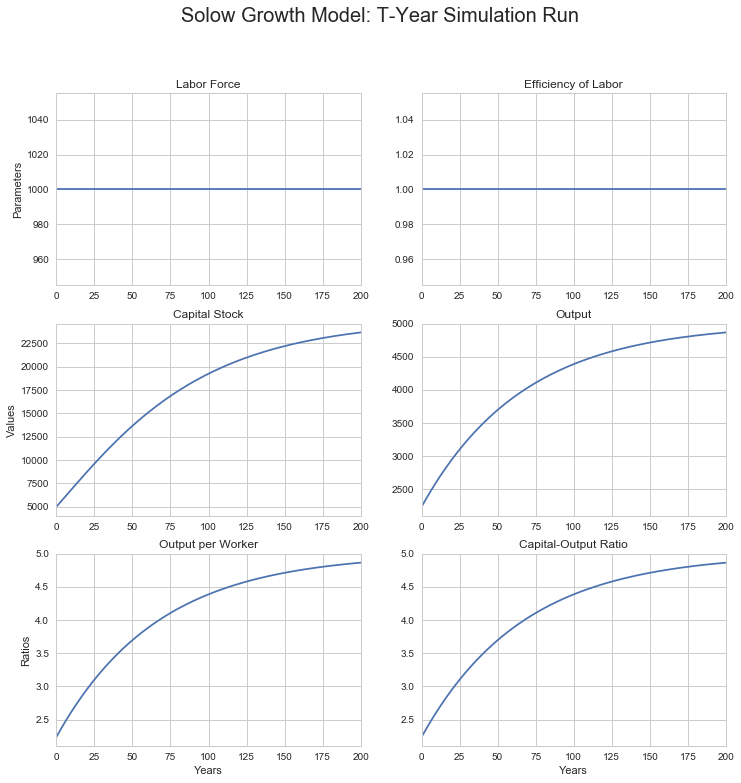

0.0 is the labor force growth rate
0.0 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [6]:
# initialize the dataframe...

T = 200

sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
    'Efficiency',
    'Capital',
    'Output',
    'Output_per_Worker',
    'Capital_Output_Ratio'],
    dtype='float')

# parameter values: labor-force growth rate, efficiency-of-labor growth rate,
# depreciation rate on the capital stock, savings-investment share of output,
# and capital share in production α...

n = 0.0
g = 0.0
delta = 0.03
s = 0.15
alpha = 0.5


# initial conditions: labor force, efficiency-of-labor, and 
# capital stock: change these parameters here...

L0 = 1000
E0 = 1
K0 = 5000

# initialize the dataframe at time 0 by setting L, E, K...

sg_df.Labor[0] = L0 
sg_df.Efficiency[0] = E0
sg_df.Capital[0] = K0

# use the production function to calculate output at time 0...

sg_df.Output[0] = (sg_df.Capital[0]**alpha *
    (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))

# calculate the last two initial values for the dataframe:
# output per worker and the capital output ratio...

sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

# And now we loop the system forward, watching what it does
# for T years...

for i in range(T):
    sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
    sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
    sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
    
    sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
    sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
    sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]
    
# plot the results...

fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(3,2,1)
sg_df.Labor.plot(ax = ax1, title = "Labor Force")
plt.ylabel("Parameters")

ax2 = plt.subplot(3,2,2)
sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

ax3 = plt.subplot(3,2,3)
sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
plt.ylabel("Values")

ax4 = plt.subplot(3,2,4)
sg_df.Output.plot(ax = ax4, title = "Output")

ax5 = plt.subplot(3,2,5)
sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
plt.xlabel("Years")
plt.ylabel("Ratios")

ax6 = plt.subplot(3,2,6)
sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
plt.xlabel("Years")

plt.suptitle('Solow Growth Model: T-Year Simulation Run', size = 20)

plt.show()

print(n, "is the labor force growth rate")
print(g, "is the efficiency of labor growth rate")
print(delta, "is the depreciation rate")
print(s, "is the savings rate")
print(alpha, "is the decreasing-returns-to-scale parameter")

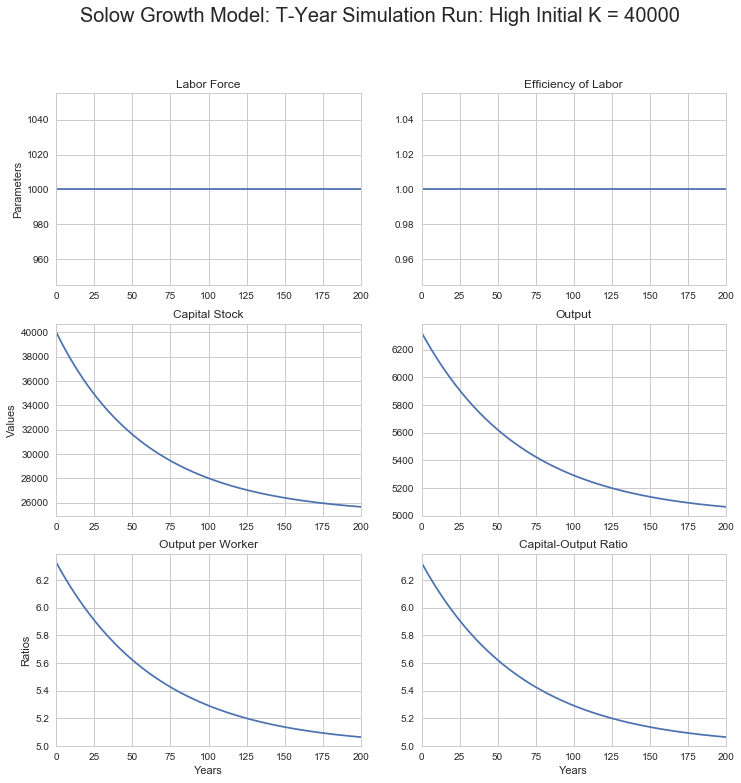

0.0 is the labor force growth rate
0.0 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [7]:
# initialize the dataframe...

T = 200

sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
    'Efficiency',
    'Capital',
    'Output',
    'Output_per_Worker',
    'Capital_Output_Ratio'],
    dtype='float')

# parameter values: labor-force growth rate, efficiency-of-labor growth rate,
# depreciation rate on the capital stock, savings-investment share of output,
# and capital share in production α...

n = 0.0
g = 0.0
delta = 0.03
s = 0.15
alpha = 0.5

# initial conditions: labor force, efficiency-of-labor, and 
# capital stock: change these parameters here...

L0 = 1000
E0 = 1
K0 = 40000

# initialize the dataframe at time 0 by setting L, E, K...

sg_df.Labor[0] = L0 = 1000
sg_df.Efficiency[0] = E0
sg_df.Capital[0] = K0

# use the production function to calculate output at time 0...

sg_df.Output[0] = (sg_df.Capital[0]**alpha *
    (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))

# calculate the last two initial values for the dataframe:
# output per worker and the capital output ratio...

sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

# And now we loop the system forward, watching what it does
# for T years...

for i in range(T):
    sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
    sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
    sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
    
    sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
    sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
    sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]
    
# plot the results...

fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(3,2,1)
sg_df.Labor.plot(ax = ax1, title = "Labor Force")
plt.ylabel("Parameters")

ax2 = plt.subplot(3,2,2)
sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

ax3 = plt.subplot(3,2,3)
sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
plt.ylabel("Values")

ax4 = plt.subplot(3,2,4)
sg_df.Output.plot(ax = ax4, title = "Output")

ax5 = plt.subplot(3,2,5)
sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
plt.xlabel("Years")
plt.ylabel("Ratios")

ax6 = plt.subplot(3,2,6)
sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
plt.xlabel("Years")

plt.suptitle('Solow Growth Model: T-Year Simulation Run: High Initial K = 40000', size = 20)

plt.show()

print(n, "is the labor force growth rate")
print(g, "is the efficiency of labor growth rate")
print(delta, "is the depreciation rate")
print(s, "is the savings rate")
print(alpha, "is the decreasing-returns-to-scale parameter")

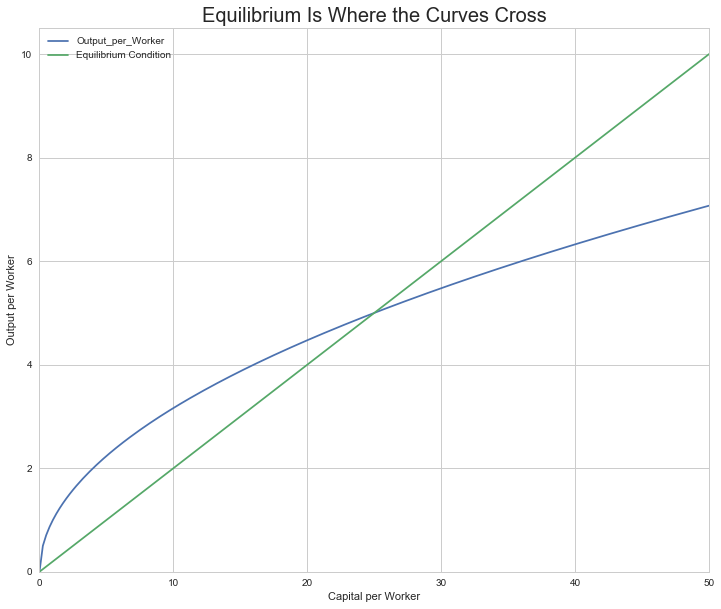

In [14]:
delta = 0.03
s = 0.15
alpha = 0.5
E = 1

output_per_worker = np.zeros((201, 3))

for i in range(201):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + i/4
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E**(1-alpha)
    output_per_worker[i, 2] = delta/s * output_per_worker[i, 0]
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker", 
        "Equilibrium Condition"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

plt.title("Equilibrium Is Where the Curves Cross", size = 20)

## 4.2.9 EXERCISES: Presenting the Solow Growth Model

**Task 1: The basics of the Solow growth model**:

In the (markdown) cell below this one, answer the questions asked:

1. What are the _economic variables_ in the Solow growth model? List their symbols, and describe what they are: ANSWER

2. What are the _parameters_ in the Solow growth model? List their symbols, and describe what they are:

3. What are the _behavioral relationships_ in the Solow growth model?

4. What is the _equilibrium condition_ in the Solow growth model?

1. What are the _economic variables_ in the Solow growth model? List their symbols, and describe what they are: <font color='blue'>ANSWER: ___ </font>

2. What are the _parameters_ in the Solow growth model? List their symbols, and describe what they are: <font color='blue'>ANSWER: ___ </font>

3. What are the _behavioral relationships_ in the Solow growth model? <font color='blue'>ANSWER: ___ </font>

4. What is the _equilibrium condition_ in the Solow growth model? <font color='blue'>ANSWER: ___ </font>

----

&nbsp;

## Catch Our Breath

<img src="https://tinyurl.com/20181029a-delong" width="300" style="float:right" />

* Ask me two questions…
* Make two comments…
* Further reading…

<br clear="all" />

----

The Core of the Solow Growth Model: <https://www.icloud.com/keynote/0i4m_VbQhypIwi3k3e5ZHlaDQ>   
Lecture Support: <http://nbviewer.jupyter.org/github/braddelong/LSF18E101B/blob/master/Growth%20Theory%20%28Part%20III%2C%20Ch.%204%29/D%26O3_4.2%20Presenting%20the%20Solow%20Growth%20Model.ipynb>

&nbsp;

----

# <font color="880000">Presenting the Solow Growth Model</font>

&nbsp;

###  <font color="880000">How Does This System Behave Over Time?</font>

* Let’s start it up and see…
* <http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LSF18E101B&branch=master&path=Solow_Growth_Model-Initial_Computations.ipynb>

<img style="display:block; margin-left:auto; margin-right:auto;" src="https://delong.typepad.com/.a/6a00e551f080038834022ad39f6b7c200d-pi" alt="Lecture Solow Model Core MRE Macro key" title="Lecture-_Solow_Model_Core__MRE__Macro_key.png" border="0" width="600" height="356" />

<img style="display:block; margin-left:auto; margin-right:auto;" src="https://delong.typepad.com/.a/6a00e551f080038834022ad3bf0940200b-pi" alt="Lecture Solow Model Core MRE Macro key" title="Lecture-_Solow_Model_Core__MRE__Macro_key.png" border="0" width="600" height="364" />

<img style="display:block; margin-left:auto; margin-right:auto;" src="https://delong.typepad.com/.a/6a00e551f080038834022ad37948fb200c-pi" alt="Lecture Solow Model Core MRE Macro key" title="Lecture-_Solow_Model_Core__MRE__Macro_key.png" border="0" width="600" height="358" />

<img style="display:block; margin-left:auto; margin-right:auto;" src="https://delong.typepad.com/.a/6a00e551f080038834022ad3bf095c200b-pi" alt="Lecture Solow Model Core MRE Macro key" title="Lecture-_Solow_Model_Core__MRE__Macro_key.png" border="0" width="600" height="346" />

&nbsp;

###  <font color="000088">How Does This System Behave Over Time?: Conclusions</font>

* Capital/output ratio heads for an asymptote
    * Value of that asymptote?
* Without labor efficiency growth and labor force growth, output eventually stops growing
* Without labor efficiency growth, output per worker eventually stops growing
* What are the consequences for the economy of K/Y heading for an asymptote?
* How does the economy behave once K/Y is at its asymptote?

&nbsp;

###  <font color="000088">Characteristics of the Model</font>

As is the case for all economic models, the SGM consists of:

* _Variables_: economic quantities of interest that we can calculate and  measure: L, K, E, Y.

* _Behavioral relationships_: relationships that (1) describe how humans, making economic decisions given their opportunities and opportunity costs, decide what to do, and (2) that thus determine the values of the economic variables, represented by equations that have an economic variable on the left hand side and, on the right, a set of factors that determine its value.

* _Parameters_: determine which out of a broad family of potential behavioral relations describes the behavior of the particular economic scenario at hand; the ability to work algebraically with parameters allows one to perform an enormous number of potential "what-if?" calculations very quickly and in a very small space: $ \alpha, \delta, n, g, s $

* _Equilibrium conditions_: conditions that tell us when the economy is in a position of balance.

* _Accounting identities_: statements automatically and necessarily true because of the way the variables are defined. 

&nbsp;

Almost every economic model has a single key principal economic variable at its heart.

* In the case of the Solow growth model, the key variable is labor productivity: how much the average worker in the economy is able to produce.

* Economists proceed with their analysis by looking for an equilibrium: a point of balance, a condition of rest, a state of the system toward which the model will converge over time.

* The equilibrium here is one in which the economy’s capital stock per worker, its level of real GDP per worker, and its efficiency of labor are all three growing at exactly the same proportional rate, a rate that remains constant over time.

----

&nbsp;

## Catch Our Breath

<img src="https://tinyurl.com/20181029a-delong" width="300" style="float:right" />

* Ask me two questions…
* Make two comments…
* Further reading…

<br clear="all" />

----

The Core of the Solow Growth Model: <https://www.icloud.com/keynote/0i4m_VbQhypIwi3k3e5ZHlaDQ>   
Lecture Support: <http://nbviewer.jupyter.org/github/braddelong/LSF18E101B/blob/master/Growth%20Theory%20%28Part%20III%2C%20Ch.%204%29/D%26O3_4.2%20Presenting%20the%20Solow%20Growth%20Model.ipynb>

&nbsp;

----